<a href="https://colab.research.google.com/github/s1c5000/tensorflow2.0/blob/main/%ED%9A%8C%EA%B7%80_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀

회귀는 되돌아온다 라는 뜻이다.      
평균으로의 회귀는 부모의 키평균과 자녀의 키 평균을 비교하면 자녀의 키는 보모의 키보다 평균에 가까워지려는 평균으로 되돌아오려는 경향이 있다는 것이다.    
AND, OR , XOR 도 회귀의 일종이다.

## 4.1 선형회귀

선형회귀는 데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 것이다. 선형 회귀에서 주로 사용되는 2차원에서의 직선이란 기울기와 y절편을 가지는 좌표평면 위 점들의 집합이다.      
선형 회귀를 이용하면 2개의 데이터에 대한 경향성을 예측할 수 있다. 

2018년 우리나라의 지역별 인구 증가율과 고령인구비율을 선형회귀로 예측해보겠다.

우선 시각화를 통해 데이터를 한눈에 보겠다

In [ ]:
import matplotlib.pyplot as plt

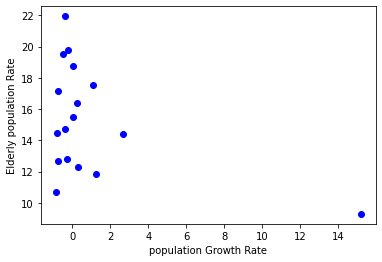

In [ ]:
population_inc = [0.3, -0.78, 1.26, 0.04, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76,2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc, population_old, 'bo')
plt.xlabel('population Growth Rate')
plt.ylabel('Elderly population Rate')
plt.show()

오른쪽 아래에 치우친 하나의 점이 눈에 뛴다. 이것은 극단치(outlier)라고 부르며 일반적인 경향에서 벗어나는 사례이다. 이 극단치는 세종시 데이터이다. 세종시는 행정수도 이전으로 만들어져 젊은 공무원등이 많이 이주해오면서 인구증가율을 높고 고령인구비율은 낮은 데이터가 많들어진 것이다.    
데이터의 일반화를 위해 극단치는 제거하는 것이 좋다.

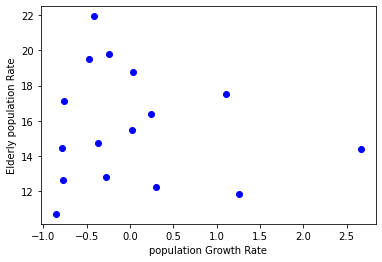

In [ ]:
population_inc = [0.3, -0.78, 1.26, 0.04, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76,2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_inc = population_inc[:5] + population_inc[6:]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc, population_old, 'bo')
plt.xlabel('population Growth Rate')
plt.ylabel('Elderly population Rate')
plt.show()

위의 데이터로 선형 회귀를 해보겠다.    
데이터의 경향성을 가장 잘 설명하는 하나의 직선과 각 데이터의 차이를 잔차라고한다.      
이 잔차를 최소화 하는 알고리즘을 최소제곱법이라고한다.       
최소제곱법으로 직선 y = ax+b를 구할 수 있다.    
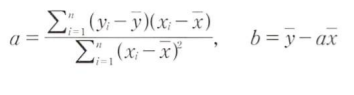

x햇, y햇은 데이터의 평균을 의미한다

a:  -0.3534882705677306 b:  15.669436042006444


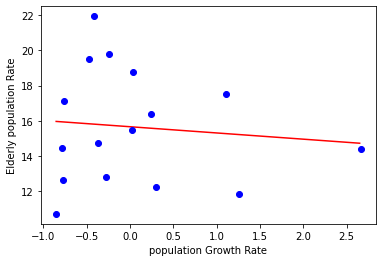

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [0.3, -0.78, 1.26, 0.04, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76,2.66]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
x = population_inc[:5] + population_inc[6:]
y = population_old[:5] + population_old[6:]

#x,y의 평균
x_bar = sum(x) / len(x)
y_bar = sum(y) / len(y)

#최소제곱법으로 a,b 구한다.
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(y,x))])
a /= sum([(x_- x_bar) ** 2 for x_ in x])
b= y_bar - a * x_bar
print('a: ', a, 'b: ', b)

#그래프를 그리기 위해 회귀선의 x, y 데이터를 구한다.
line_x = np.arange(min(x), max(x), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선 그린다.
plt.plot(line_x, line_y, 'r-')

plt.plot(x,y,'bo')
plt.xlabel('population Growth Rate')
plt.ylabel('Elderly population Rate')
plt.show()

이 회귀선에서 데이터의 경향을 알 수 있다. 인구증가율이 증가하면 고령인구비율은 감소한다       
이러한 복잡한 식을 사용하지 않아도 텐서플로우를 이용하면 회귀선을 구할 수 있다.

99 a:  0.14610009 b:  6.3975067 loss:  95.5457
199 a:  -0.09843262 b:  10.944877 loss:  32.05037
299 a:  -0.2442327 b:  13.645391 loss:  13.869156
399 a:  -0.31468445 b:  14.950557 loss:  10.2977295
499 a:  -0.3421195 b:  15.458819 loss:  9.826429
599 a:  -0.35075128 b:  15.618732 loss:  9.7847395
699 a:  -0.35295042 b:  15.659473 loss:  9.782274
799 a:  -0.35340276 b:  15.667854 loss:  9.782177
899 a:  -0.3534774 b:  15.669237 loss:  9.782175
999 a:  -0.3534872 b:  15.66942 loss:  9.782175


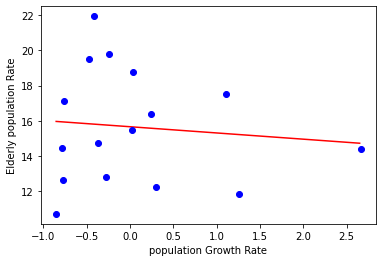

In [ ]:
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt

x = [0.3, -0.78, 1.26, 0.04, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76,2.66]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
x = population_inc[:5] + population_inc[6:]
y = population_old[:5] + population_old[6:]

#a와 b를 랜덤하게 초기화한다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

#잔차의 제곱의 평군을 반환하는 함수
def compute_loss():
  y_pred = a * x + b
  loss = tf.reduce_mean((y - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
  #잔차의 제곱의 평균을 최소화(minimize)한다.\
  optimizer.minimize(compute_loss, var_list=[a,b])

  if i % 100 == 99:
    print(i, 'a: ', a.numpy(), 'b: ', b.numpy(), 'loss: ', compute_loss().numpy())

line_x = np.arange(min(x), max(x), 0.01)
line_y = a * line_x + b

#그래프를 그린다.
plt.plot(line_x, line_y, 'r-')
plt.plot(x,y, 'bo')
plt.xlabel('population Growth Rate')
plt.ylabel('Elderly population Rate')
plt.show()

최적화함수(optimizer)는 복잡한 미분 계산 및 가중치 업데이트를 자동으로 진행해주는 도구이다.     
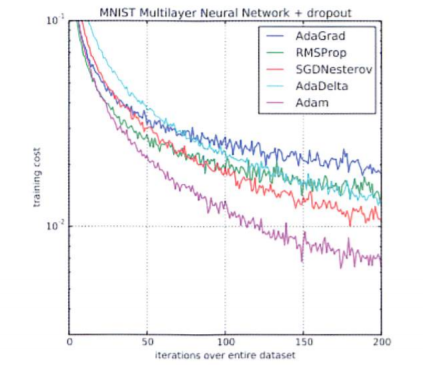

1000번의 학습을 거쳐 a 와 b는 잔차의 평균을 최소화하는 적절한 값에 도달한다.



---



---



## 4.2 다항 회귀

비선형회귀는 선형 회귀로는 표현할 수 없는 데이터의 경향성을 설명하기 위한 회귀이다. 이 가운데 x**2, x**3등의 다항식을 이용한 회귀를 다항회귀라고한다.     
즉 회귀선이 2차함수, 3차 함수의 곡선이 되는 것이다.    
위의 선형회귀 예제에서 직선 ax + b 대신 a(x**2) + bx + c를 회귀선으로 쓴다면 어떨까

99 a:  3.8140895 b:  -5.4415035 c:  6.7197647 loss:  65.59801
199 a:  2.6431835 b:  -4.436812 c:  10.560355 loss:  29.659372
299 a:  1.1705655 b:  -2.1969278 c:  13.1354685 loss:  15.266355
399 a:  0.24841776 b:  -0.7749794 c:  14.707832 loss:  10.735916
499 a:  -0.23177372 b:  -0.034842502 c:  15.527874 loss:  9.671038
599 a:  -0.4463544 b:  0.29586855 c:  15.894437 loss:  9.482597
699 a:  -0.5289708 b:  0.42319575 c:  16.035574 loss:  9.457409
799 a:  -0.5564127 b:  0.4654889 c:  16.082455 loss:  9.454867
899 a:  -0.5642692 b:  0.47759604 c:  16.095879 loss:  9.454676
999 a:  -0.5661962 b:  0.48056626 c:  16.09917 loss:  9.454665


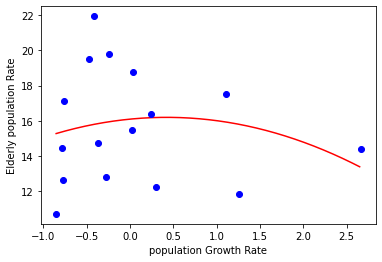

In [ ]:
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt

x = [0.3, -0.78, 1.26, 0.04, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76,2.66]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
x = population_inc[:5] + population_inc[6:]
y = population_old[:5] + population_old[6:]

#a와 b를 랜덤하게 초기화한다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

#잔차의 제곱의 평군을 반환하는 함수
def compute_loss():
  y_pred = a * x*x + b * x + c
  loss = tf.reduce_mean((y - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
  #잔차의 제곱의 평균을 최소화(minimize)한다.
  optimizer.minimize(compute_loss, var_list=[a,b,c])

  if i % 100 == 99:
    print(i, 'a: ', a.numpy(), 'b: ', b.numpy(),'c: ', c.numpy(), 'loss: ', compute_loss().numpy())

line_x = np.arange(min(x), max(x), 0.01)
line_y = a * line_x * line_x + b*line_x + c

#그래프를 그린다.
plt.plot(line_x, line_y, 'r-')
plt.plot(x,y, 'bo')
plt.xlabel('population Growth Rate')
plt.ylabel('Elderly population Rate')
plt.show()

y_pred를 직선에서 2차함수로 바꾸고 c 를 추가하였다.     
직선회귀보다 손실이 감소하였다.     
회귀선을 3차함수로 바꾸면 어떨까

99 a:  -1.2633301 b:  6.173199 c:  -3.9803965 d:  6.169732 loss:  65.06533
199 a:  -2.1018434 b:  7.145483 c:  -2.2365797 d:  9.7522 loss:  31.905672
299 a:  -1.7777327 b:  5.436174 c:  -0.9351385 d:  11.940195 loss:  20.878994
399 a:  -1.02046 b:  3.067638 c:  -0.5807933 d:  13.472704 loss:  14.726336
499 a:  -0.29412782 b:  0.94034654 c:  -0.4830727 d:  14.63345 loss:  11.194515
599 a:  0.27746978 b:  -0.7145738 c:  -0.43785608 d:  15.504506 loss:  9.373886
699 a:  0.6894203 b:  -1.9048655 c:  -0.40914473 d:  16.12664 loss:  8.5357065
799 a:  0.96761197 b:  -2.7083158 c:  -0.3903103 d:  16.545866 loss:  8.190464
899 a:  1.1444496 b:  -3.2189724 c:  -0.37844375 d:  16.812174 loss:  8.063197
999 a:  1.2503672 b:  -3.5248213 c:  -0.37135434 d:  16.971645 loss:  8.021246


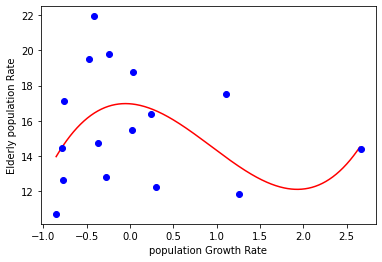

In [ ]:
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt

x = [0.3, -0.78, 1.26, 0.04, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76,2.66]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
x = population_inc[:5] + population_inc[6:]
y = population_old[:5] + population_old[6:]

#a와 b를 랜덤하게 초기화한다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

#잔차의 제곱의 평군을 반환하는 함수
def compute_loss():
  y_pred = a * x*x*x + b * x*x + c*x + d
  loss = tf.reduce_mean((y - y_pred) ** 2)
  return loss

optimizer = tf.optimizers.Adam(lr=0.07)
for i in range(1000):
  #잔차의 제곱의 평균을 최소화(minimize)한다.
  optimizer.minimize(compute_loss, var_list=[a,b,c,d])

  if i % 100 == 99:
    print(i, 'a: ', a.numpy(), 'b: ', b.numpy(),'c: ', c.numpy(), 'd: ', d.numpy(),'loss: ', compute_loss().numpy())

line_x = np.arange(min(x), max(x), 0.01)
line_y = a * line_x*line_x*line_x + b*line_x*line_x + c*line_x + d

#그래프를 그린다.
plt.plot(line_x, line_y, 'r-')
plt.plot(x,y, 'bo')
plt.xlabel('population Growth Rate')
plt.ylabel('Elderly population Rate')
plt.show()

3차함수가 그려졌지만 데이터의 경향성을 잘 설명한다고 보기는 어렵다.     
다항회귀에서 더 나아가 비선형회귀를 적용해볼 수도 있다.    
식을 계속 바궈보며 최적의 회귀실을 찾기위해 노력해야한다.

## 4.3 딥러닝 네트워크를 이용한 회귀

In [ ]:
import numpy as np
import tensorflow as tf


x = [0.3, -0.78, 1.26, 0.04, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76,2.66]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
x = population_inc[:5] + population_inc[6:]
y = population_old[:5] + population_old[6:]

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
  tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


이 모델을 2개의 Dense레이어로 구성된다. 첫번째 Dense 레이어는 활성화함수로 tanh를 사용했다.      
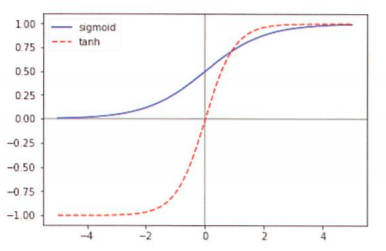

첫번째 레이어에는 6개의 뉴런을 할당했다. 뉴런이 많을수록 딥러닝 네트워크의 표현력이 좋아지지만 너무 많으면 학습이 제대로 안 되거나 과적합 될 수 있다. 두번째 레이어는 입력 x 에 대한 y값 하나만 출력해야하기때문에 뉴런수가 1개이다     
optimizer의 손실은 mse를 사용했다

In [ ]:
history = model.fit(x,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 254.8517
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 138.4836
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 17.8418
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 9.7524
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 9.6239
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 9.6058
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 9.5905
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 9.5747
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 9.5578
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 9.5395


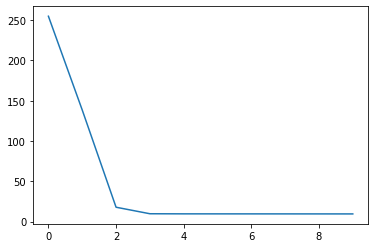

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

어느정도 학습 한 뒤 손실이 줄어들지 않는것이 보인다.    
손실에 변화가 거의 없으면 학습이 다 된 것이다.    
검증데이터는 언제 멈출지 판단하는 중요한 지표가 된다. 후에 학습하겠다

In [ ]:
model.predict(x)

array([[15.743902],
       [15.851601],
       [15.02335 ],
       [15.83634 ],
       [15.165167],
       [15.769459],
       [15.884848],
       [15.889095],
       [15.853497],
       [15.890907],
       [15.837162],
       [15.890835],
       [15.887125],
       [15.841507],
       [15.855349],
       [14.020605]], dtype=float32)

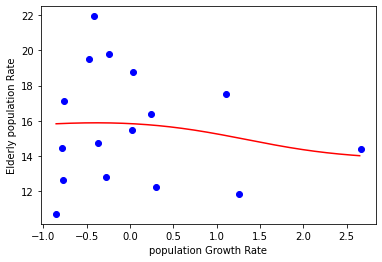

In [ ]:
import matplotlib.pyplot as plt

line_x = np.arange(min(x), max(x), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(x,y,'bo')
plt.xlabel('population Growth Rate')
plt.ylabel('Elderly population Rate')
plt.show()

그래프를 그려보니 다항회귀의 2차함수와 회귀선이 비슷하다.     
이처럼 회귀식을 가정하고 변수를 직접 추정하지 않아도 딥러닝 네트워크를 이용해 회귀선을 예측하는 방법을 알아봤다.

## 4.4 보스턴 주택 가격 데이터세트

In [ ]:
from tensorflow.keras.datasets import boston_housing

In [ ]:
(train_x, train_y), (test_x, test_y) = boston_housing.load_data()

In [ ]:
print(len(train_x), len(test_x))
print(train_x[0])
print(train_y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


train데이터중 일부를 validation(검증)데이터로 만들 수 있다.

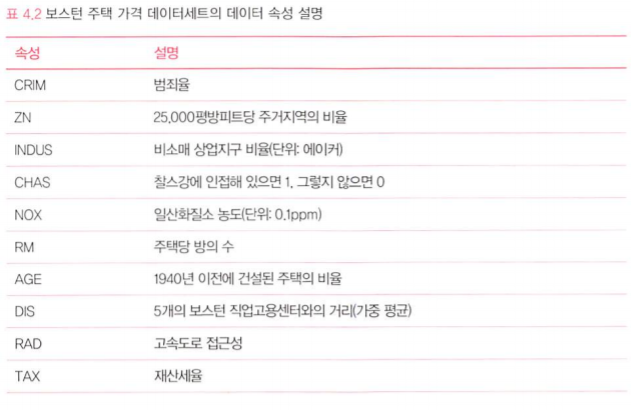       
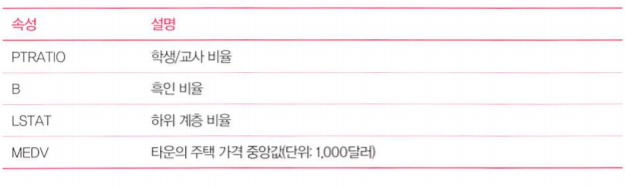

해당 표에서 주목해야 할 점은 각 데이터의 단위가 다르다는 것이다.     
실생활에서 얻는 데이터는 이처럼 다양한 단위를 갖고 있는 경우가 많다.    
딥러닝에서는 이러한 데이터를 전처리해서 정규화해야 학습 효율이 좋다.

데이터를 정규화하려면 각 데이터에서 평균값을 뺀 다음 표준 편차르 나눈다. 이것은 데이터의 분포를 정규분포로 옮기는 역할을 한다.      
평균과 표준편차를 구할때는 훈련데이터의 평균과 표준편차를 구한 후 이것으로 테스트 데이터도 정규화한다.      
테스트데이터가 없는 경우도 있기때문에 훈련데이터의 평균과 표준편차로 정규화를 하는 것이다.

In [ ]:
x_mean = train_x.mean()
x_std = train_x.std()
train_x -= x_mean
train_x /= x_std
test_x -= x_mean
test_x /= x_std

y_mean = train_y.mean()
y_std = train_y.std()
train_y -= y_mean
train_y /= y_std
test_y -= y_mean
test_y /= y_std

print(train_x[0])
print(train_y[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157


정규화를 마치고 딥러닝네트워크를 학습시킬 차례이다.

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
  tf.keras.layers.Dense(units=39, activation='relu'),
  tf.keras.layers.Dense(units=26, activation='relu'),
  tf.keras.layers.Dense(units=1)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


레이어의 수와 은닉층의 뉴런 수를 늘리면 모델의 표현력이 좋아지기 때문에 더 복잡한 내용을 학습시킬 수 있다.    
첫 번째 레이어는 x 데이터의 속성을 모두 불러오기위해 input_shape를 13(train_x의 하이퍼파라미터 수) 으로 지정해주고 마지막 레이어는 주택가격인 y값 한개만 예측되면 되기때문에 뉴런의 수가 1개이다.

In [ ]:
history = model.fit(train_x, train_y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 14ms/step - loss: 2.1617 - val_loss: 1.0637
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.7327 - val_loss: 1.1112
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.7042 - val_loss: 1.0948
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6708 - val_loss: 1.0101
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.7024 - val_loss: 1.3153
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.7824 - val_loss: 1.0386
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6623 - val_loss: 1.0422
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6429 - val_loss: 1.0738
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6408 - val_loss: 1.0112
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6915 - val_loss: 1.0240
Epoch 11/25
10/10 

validation_split은 훈련데이터의 25프로 정도를 검증데이터로 떼서 학습결과를 검증하기위해 사용한다.

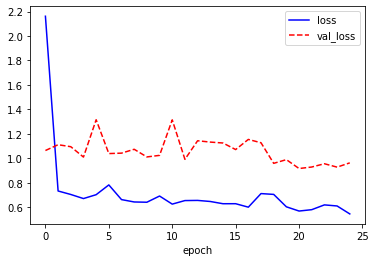

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

훈련데이터는 꾸준히 감소하는데 비해 검증데이터의 손실을 감소하지 않는다. 모델의 성능이 좋지 않을 것이다

In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 2ms/step - loss: 0.6416


0.6416417360305786

테스트데이터의 손실은 0.64이다 훈련데이터 손실인0.54와는 거리가 있어보인다.     
네트워크가 y 값을 얼마나 잘 예측하는지 확인하기 위해서 실제 주택 가격과 예측 주택가격을 1:1로 비교해 보겠다.

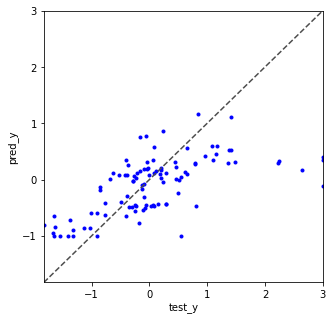

In [ ]:
pred_y = model.predict(test_x)

plt.figure(figsize=(5,5))
plt.plot(test_y, pred_y, 'b.')
plt.axis([min(test_y), max(test_y), min(test_y), max(test_y)])

#y=x에 해당하는 대각선
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], ls='--', c='.3')
plt.xlabel('test_y')
plt.ylabel('pred_y')
plt.show()

검증데이터와 테스트데이터에 대해 모두 좋은 예측성적을 내려면 어떻게 해야할까?    
검증데이터를 이용해 학습도중에 끼어들어 과적합될 학습을 멈춰야한다    
학습도중에 끼어들기 위해선 callback 함수를 사용한다.      
콜백함수는 모델을 학습할때 에포크가 끝날때마다 호출된다.    
model.fit()함수에 callbacks인수를 사용해 콜백 함수의 리스트를 지정할 수 있다.

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
  tf.keras.layers.Dense(units=39, activation='relu'),
  tf.keras.layers.Dense(units=26, activation='relu'),
  tf.keras.layers.Dense(units=1)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_x, train_y, epochs=25, batch_size=32, validation_split=0.25,
  callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 11ms/step - loss: 2.2838 - val_loss: 1.3352
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.8032 - val_loss: 1.0660
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.7111 - val_loss: 1.0567
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.7232 - val_loss: 1.4663
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.7675 - val_loss: 1.0402
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6238 - val_loss: 1.1920
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.6474 - val_loss: 1.0057
Epoch 8/25
10/10 [==============================] - 0s 4ms/step - loss: 0.6294 - val_loss: 1.1031
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.6566 - val_loss: 0.9719
Epoch 10/25
10/10 [==============================] - 0s 4ms/step - loss: 0.5945 - val_loss: 0.9961
Epoch 11/25
10/10 

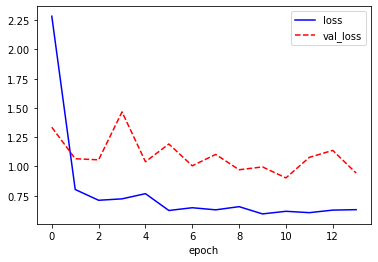

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 2ms/step - loss: 0.6506


0.6506338119506836

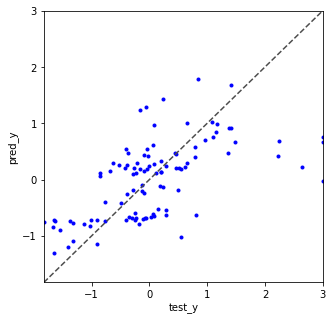

In [ ]:
pred_y = model.predict(test_x)

plt.figure(figsize=(5,5))
plt.plot(test_y, pred_y, 'b.')
plt.axis([min(test_y), max(test_y), min(test_y), max(test_y)])

#y=x에 해당하는 대각선
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], ls='--', c='.3')
plt.xlabel('test_y')
plt.ylabel('pred_y')
plt.show()

callback의 EarlyStopping을 이용해 과적합을 막으면 학습에 도움을 줄 수 있다.